# Vendo funcionando em um pequeno exemplo

In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans as scikit_KMeans

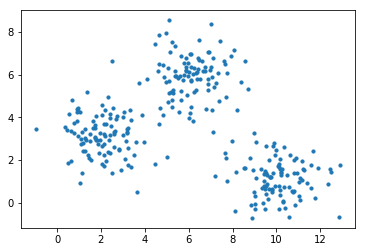

In [ ]:
dataset = pd.read_csv('dataset.csv', header=None)
dataset = np.array(dataset)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.show()

In [ ]:
scikit_kmeans = scikit_KMeans(n_clusters=3)

scikit_kmeans.fit(dataset)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
scikit_kmeans.cluster_centers_

array([[10.03081014,  1.12728525],
       [ 2.08059639,  3.14281045],
       [ 6.15412257,  5.94592545]])

In [ ]:
mascara_0 = scikit_kmeans.labels_ == 0
soma_0 = np.sum((dataset[mascara_0] - scikit_kmeans.cluster_centers_[0])**2)

mascara_1 = scikit_kmeans.labels_ == 1
soma_1 = np.sum((dataset[mascara_1] - scikit_kmeans.cluster_centers_[1])**2)

mascara_2 = scikit_kmeans.labels_ == 2
soma_2 = np.sum((dataset[mascara_2] - scikit_kmeans.cluster_centers_[2])**2)

In [71]:
soma_0 + soma_1 + soma_2

608.6035508327782

In [74]:
np.mean(dataset[mascara_0], axis=0)

array([10.03081014,  1.12728525])

Inércia =  608.6035508327782


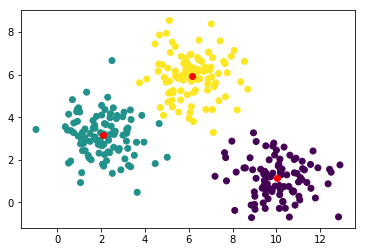

In [ ]:
print("Inércia = ", scikit_kmeans.inertia_)

plt.scatter(dataset[:,0], dataset[:,1], c=scikit_kmeans.labels_)
plt.scatter(scikit_kmeans.cluster_centers_[:,0], 
            scikit_kmeans.cluster_centers_[:,1], c='red')

plt.show()


# Quantização de cores usando K-Means

Reduzir o número de cores necessárias para mostrar a imagem do palácio de verão (China). Temos uma imagem de 96.615 cores exclusivas e vamos representa-la com 64 cores, preservando a qualidade geral da aparência.


Neste exemplo, os pixels são representados em um espaço 3D e o K-means é usado para encontrar 64 conjuntos de cores. Na literatura de processamento de imagens, o livro de códigos obtido dos meios K (os centros de cluster) é chamado de paleta de cores. Usando um único byte, é possível endereçar até 256 cores, enquanto uma codificação RGB requer 3 bytes por pixel. O formato do arquivo GIF, por exemplo, usa essa paleta.

Para comparação, também é mostrada uma imagem quantizada usando um livro de códigos aleatório (cores escolhidas 
aleatoriamente).


Notebook baseado no https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import cv2

In [ ]:
num_cores = 64

In [ ]:
img_palacio = cv2.imread("summer_palace.jpg")
img_palacio = cv2.cvtColor(img_palacio, cv2.COLOR_BGR2RGB)

In [ ]:
img_palacio.shape

(370, 555, 3)

In [ ]:
img_palacio = np.array(img_palacio, dtype=np.float64) / 255

In [ ]:
img_palacio.shape

(370, 555, 3)

In [ ]:
largura, altura, dimensao = original_shape = tuple(img_palacio.shape)

In [ ]:
if dimensao == 3:
  image_array = np.reshape(img_palacio, (largura * altura, dimensao))

In [ ]:
print("Modelo de ajuste em uma pequena subamostra dos dados")

image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters = num_cores, random_state = 0).fit(image_array_sample)


Modelo de ajuste em uma pequena subamostra dos dados


In [ ]:
print("Prevendo índices de cores na imagem completa (k-médias)")
labels = kmeans.predict(image_array)

Prevendo índices de cores na imagem completa (k-médias)


In [ ]:
def recreate_image(codebook, labels, w, h):
#   Recriando a imagem (compactada) do centros e labels
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

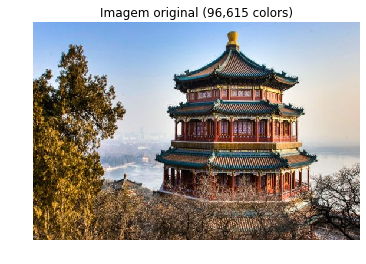

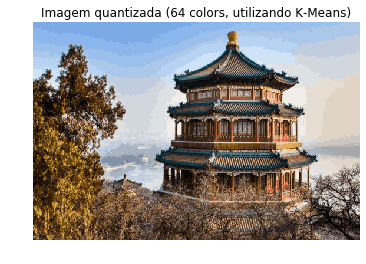

In [ ]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Imagem original (96,615 colors)')
plt.imshow(img_palacio)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagem quantizada (64 colors, utilizando K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, largura, altura))

plt.show()

Produzido por: Victória Maia